# **Pie Charts**


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 124.2 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 71.3 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [5]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-12 19:01:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  53.2MB/s    in 2.9s    

2025-06-12 19:01:31 (53.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



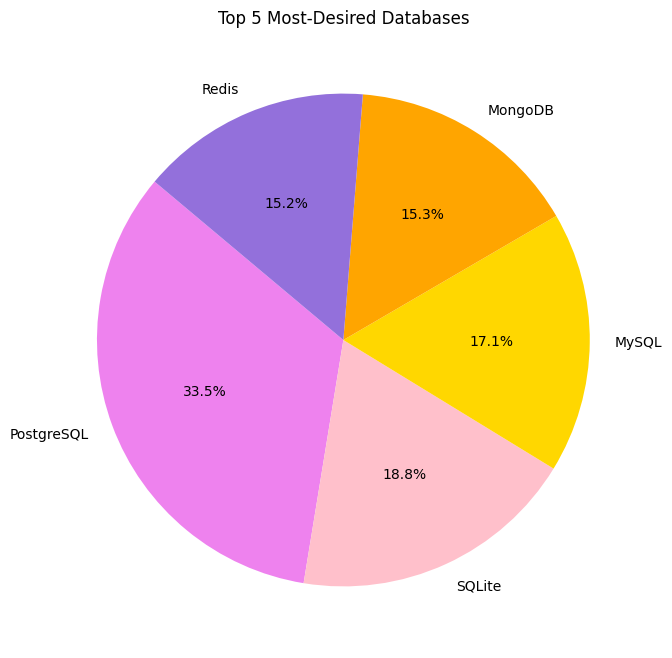

In [14]:
#  Explode DatabaseWantToWorkWith into separate rows
df_exploded = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()


# Count occurrences of the top 5 databases
db_counts = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(db_counts.values, labels=db_counts.index, autopct='%1.1f%%', startangle=140, colors=["violet", "pink", "gold", "orange", "mediumpurple"])
plt.title("Top 5 Most-Desired Databases")
plt.show()

1.2 The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



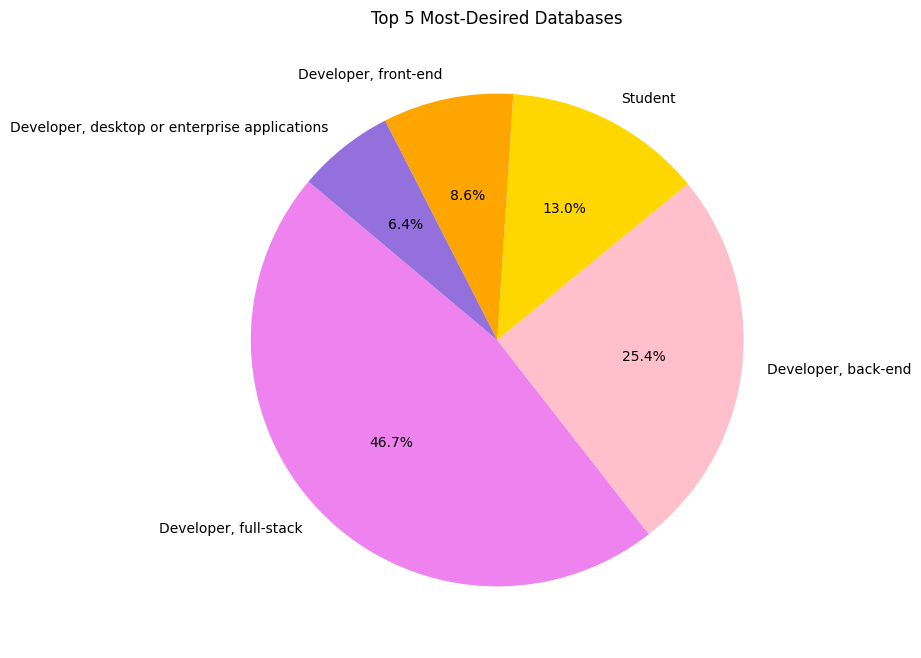

In [16]:
# Step 3: Explode DevType into separate rows
df_exploded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# Step 4: Get top 5 DevType role names by frequency
top_roles_counts = df_exploded['DevType'].value_counts().nlargest(5)
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_roles_counts.values, labels=top_roles_counts.index, autopct='%1.1f%%', startangle=140, colors=["violet", "pink", "gold", "orange", "mediumpurple"])
plt.title("Top 5 Most-Desired Databases")
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [27]:
# Find similar column names
similar_columns = [col for col in df.columns if 'OpSysProfessional' in col]
print(similar_columns)


['OpSysProfessional use']


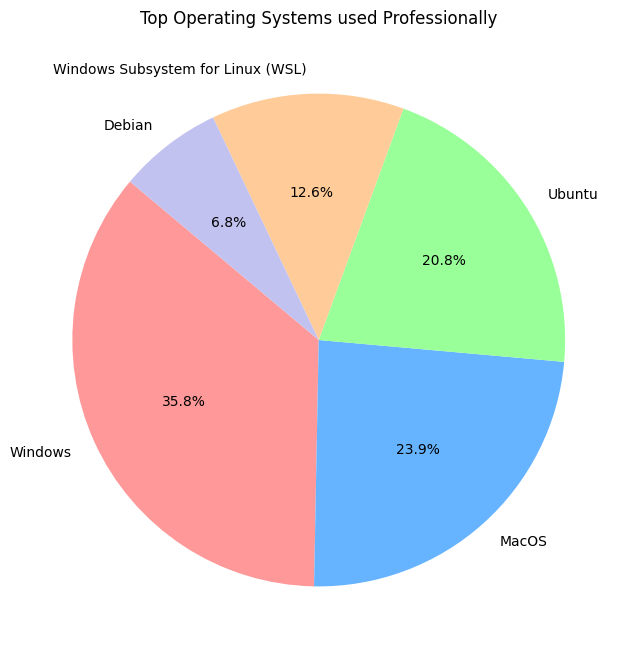

In [29]:


# Rename the column to remove spaces
df = df.rename(columns={"OpSysProfessional use": "OpSysProfessionalUse"})

# Explode the column into separate rows
df_exploded = df.assign(OpSysProfessionalUse=df['OpSysProfessionalUse'].str.split(';')).explode('OpSysProfessionalUse')

#  Count occurrences of each OS and select the top ones
os_counts = df_exploded['OpSysProfessionalUse'].value_counts().nlargest(5)

#  Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(os_counts.values, labels=os_counts.index, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"])
plt.title("Top Operating Systems used Professionally")
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



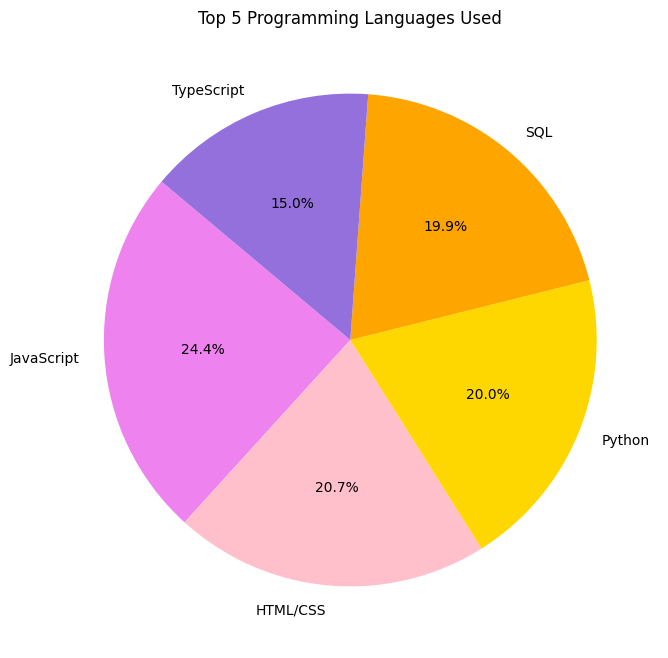

In [38]:
# Step 1: Explode the column into separate rows
df_exploded = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()

# Step 2: Count occurrences of each language and select the top 5
lang_counts = df_exploded['LanguageHaveWorkedWith'].value_counts().nlargest(5)

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%', startangle=140, colors=["violet", "pink", "gold", "orange", "mediumpurple"])
plt.title("Top 5 Programming Languages Used")
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



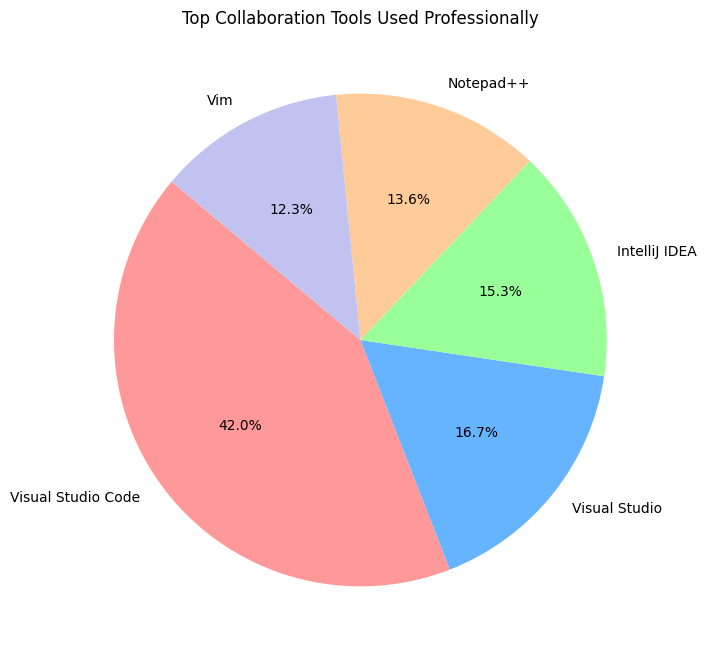

In [31]:
# Step 1: Explode the column into separate rows
df_exploded = df.assign(NEWCollabToolsHaveWorkedWith=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')
df_exploded['NEWCollabToolsHaveWorkedWith'] = df_exploded['NEWCollabToolsHaveWorkedWith'].str.strip()

# Step 2: Count occurrences of each tool and select the top ones
tool_counts = df_exploded['NEWCollabToolsHaveWorkedWith'].value_counts().nlargest(5)

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(tool_counts.values, labels=tool_counts.index, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"])
plt.title("Top Collaboration Tools Used Professionally")
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



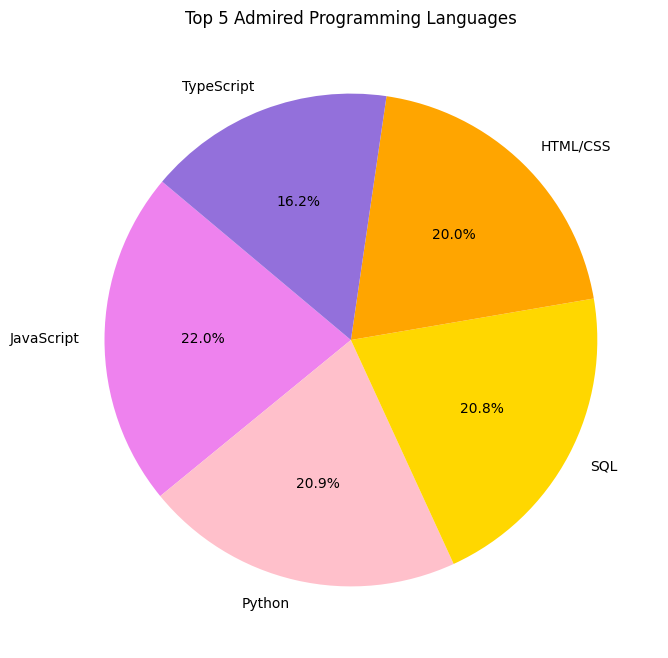

In [39]:
# Step 1: Explode the column into separate rows
df_exploded = df.assign(LanguageAdmired=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()

# Step 2: Count occurrences of each language and select the top 5
admired_counts = df_exploded['LanguageAdmired'].value_counts().nlargest(5)

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(admired_counts.values, labels=admired_counts.index, autopct='%1.1f%%', startangle=140, colors=["violet", "pink", "gold", "orange", "mediumpurple"])
plt.title("Top 5 Admired Programming Languages")
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



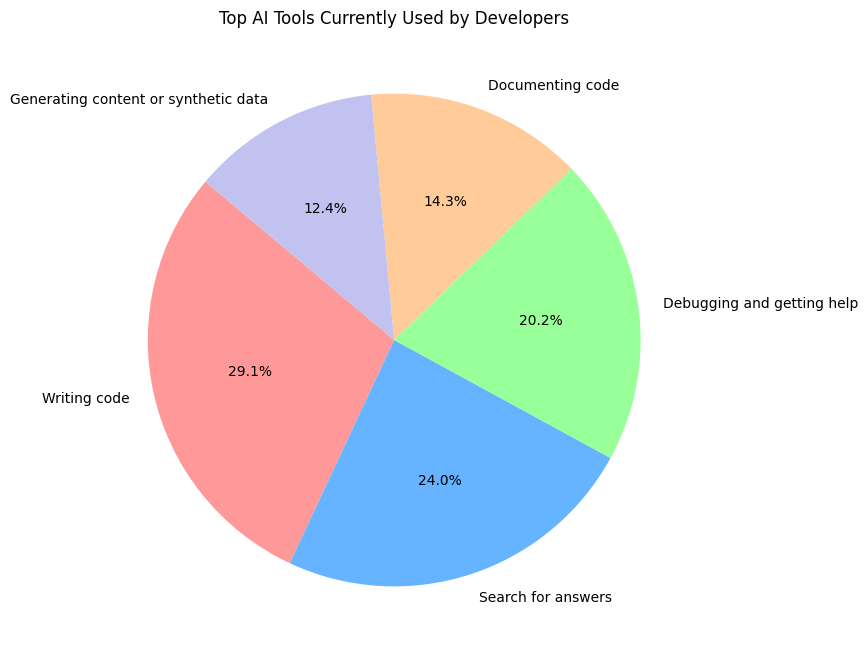

In [34]:
# Rename the column to remove spaces
df = df.rename(columns={"AIToolCurrently Using": "AIToolCurrentlyUsing"})

# Step 1: Explode the column into separate rows
df_exploded = df.assign(AIToolCurrentlyUsing=df['AIToolCurrentlyUsing'].str.split(';')).explode('AIToolCurrentlyUsing')
df_exploded['AIToolCurrentlyUsing'] = df_exploded['AIToolCurrentlyUsing'].str.strip()

# Step 2: Count occurrences of each tool and select the top 5
tool_counts = df_exploded['AIToolCurrentlyUsing'].value_counts().nlargest(5)

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(tool_counts.values, labels=tool_counts.index, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"])
plt.title("Top AI Tools Currently Used by Developers")
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



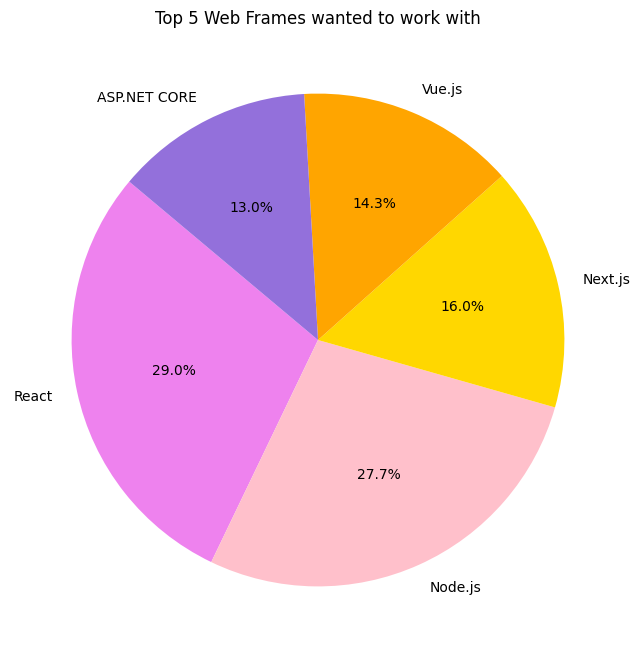

In [40]:


# Step 1: Explode the column into separate rows
df_exploded = df.assign(WebframeWantToWorkWith=df['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')
df_exploded['WebframeWantToWorkWith'] = df_exploded['WebframeWantToWorkWith'].str.strip()

# Step 2: Count occurrences of each tool and select the top 5
webframe_counts = df_exploded['WebframeWantToWorkWith'].value_counts().nlargest(5)

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(webframe_counts.values, labels=webframe_counts.index, autopct='%1.1f%%', startangle=140, colors=["violet", "pink", "gold", "orange", "mediumpurple"])
plt.title("Top 5 Web Frames wanted to work with")
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



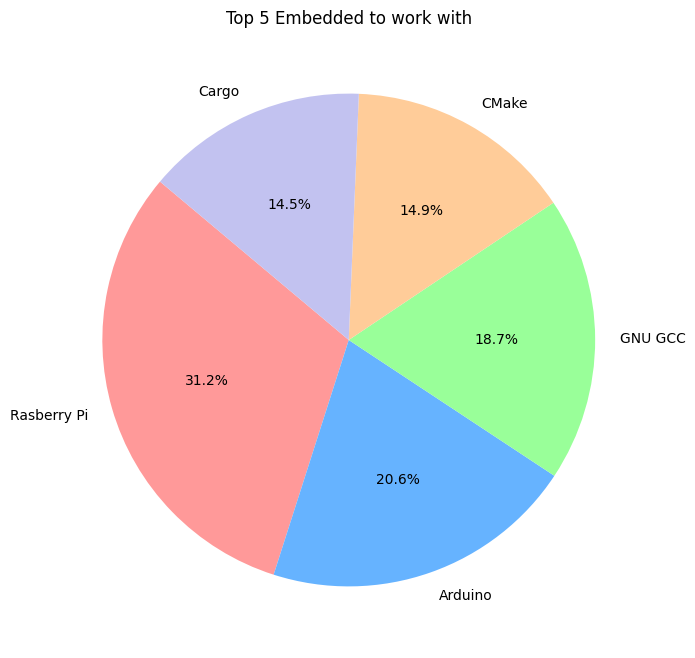

In [37]:
# Step 1: Explode the column into separate rows
df_exploded = df.assign(EmbeddedWantToWorkWith=df['EmbeddedWantToWorkWith'].str.split(';')).explode('EmbeddedWantToWorkWith')
df_exploded['EmbeddedWantToWorkWith'] = df_exploded['EmbeddedWantToWorkWith'].str.strip()

# Step 2: Count occurrences of each tool and select the top 5
embed_counts = df_exploded['EmbeddedWantToWorkWith'].value_counts().nlargest(5)

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(embed_counts.values, labels=embed_counts.index, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"])
plt.title("Top 5 Embedded to work with")
plt.show()